In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
from wordcloud import WordCloud
from collections import Counter
from wordcloud import WordCloud, STOPWORDS 
import os
import matplotlib.pyplot as plt

%matplotlib inline

business_count = 409
entertainment_count = 310
politics_count = 334
sport_count = 410
tech_count = 322

# EXERCISE 1

In [2]:
train_data = pd.read_csv(r'train_set.csv')
train_data.tail()

,id,title,content,category
1780,318.0,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,tech
1781,319.0,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,tech
1782,320.0,Be careful how you code,A new European directive could put software w...,tech
1783,321.0,US cyber security chief resigns,The man making sure US computer networks are ...,tech
1784,322.0,Losing yourself in online gaming,"Online role playing games are time-consuming,...",tech


In [3]:
def wordclouds(content):
    df = pd.DataFrame({'content':content})
    df
    #remove nans
#     transit = [x for x in transit if str(x) != 'nan']

    comment_words = '' 

    # iterate through the csv file 
    for val in df.content: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1200, height = 1200, 
                    background_color ='white', 
                    collocations=False,
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

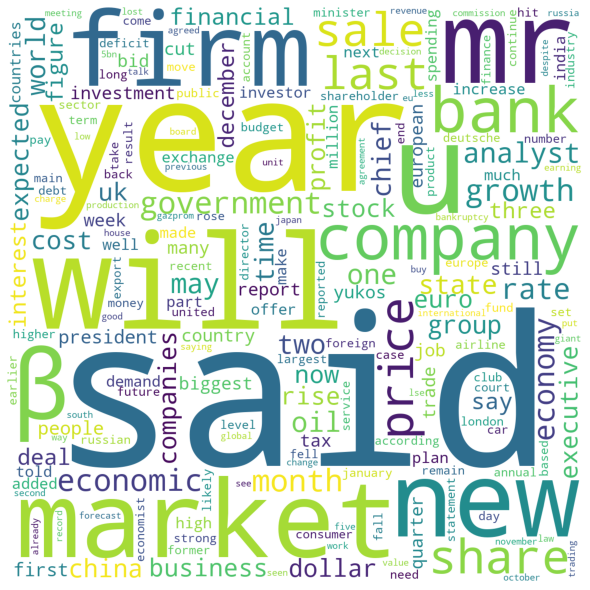

In [4]:
content = list(train_data.content[0:business_count])
wordclouds(content)

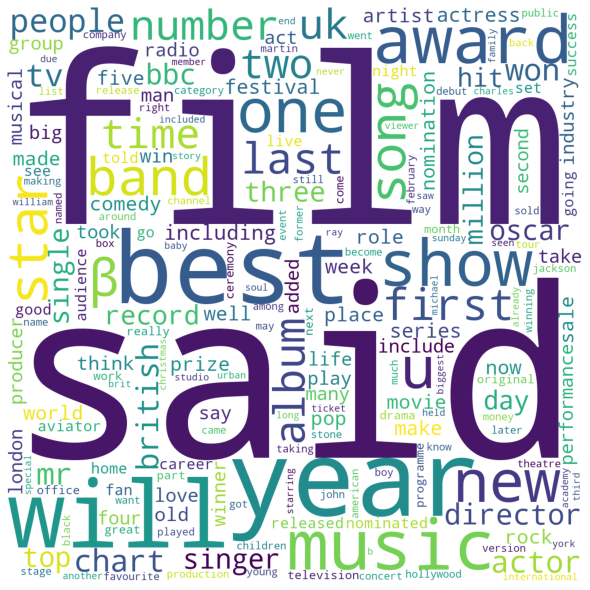

In [5]:
content = list(train_data.content[business_count:business_count + entertainment_count])
wordclouds(content)

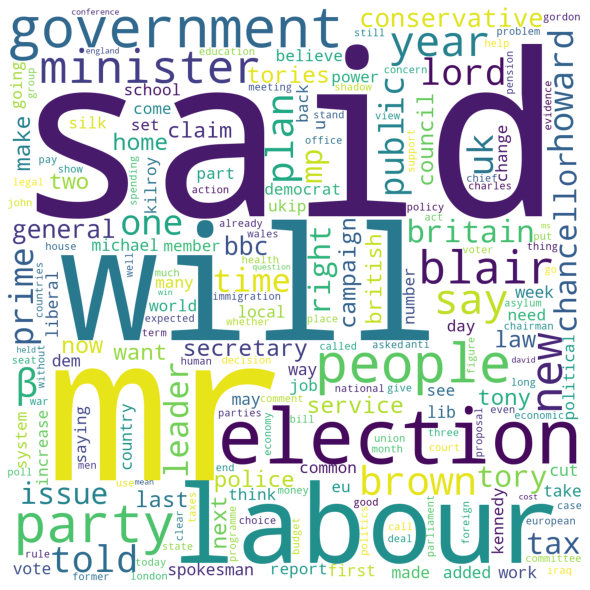

In [6]:
content = list(train_data.content[business_count + entertainment_count:business_count + entertainment_count + politics_count])
wordclouds(content)

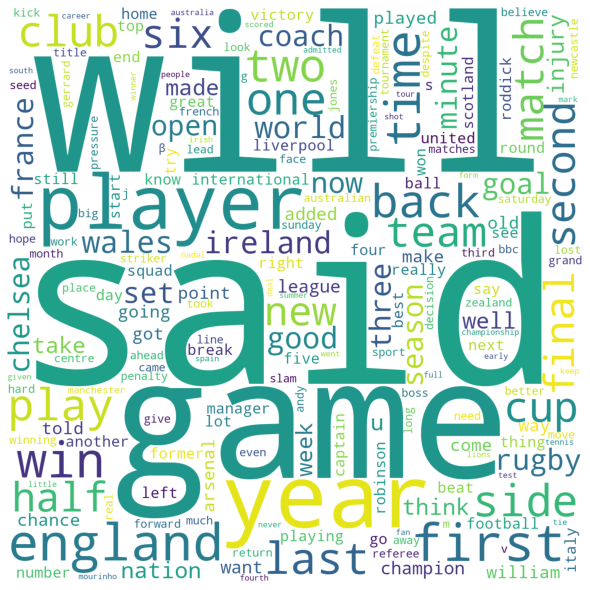

In [7]:
content = list(train_data.content[business_count + entertainment_count + politics_count:business_count + entertainment_count + politics_count + sport_count])
wordclouds(content)

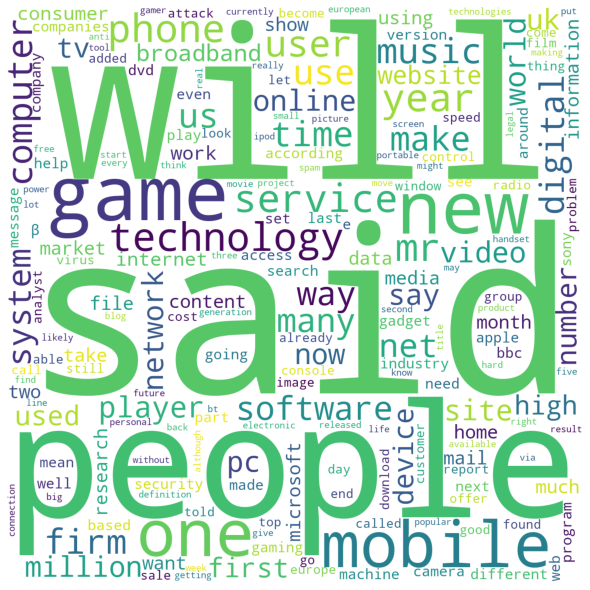

In [8]:
content = list(train_data.content[business_count + entertainment_count + sport_count + politics_count:business_count + entertainment_count + politics_count + sport_count + tech_count])
wordclouds(content)

# EXERCISE 2

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

nltk.download('stopwords')

my_stop_words = set(stopwords.words('english')) 
train_data.fillna("", inplace = True)

test_data = pd.read_csv(r'test_set.csv')
test_data.fillna("", inplace = True)

test_data.tail()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikitas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,title,content,category
435,75.0,US peer-to-peer pirates convicted,The first convictions for piracy over peer-to...,tech
436,76.0,Google launches TV search service,The net search giant Google has launched a se...,tech
437,77.0,Rich pickings for hi-tech thieves,"Viruses, trojans and other malicious programs...",tech
438,78.0,Blog reading explodes in America,"Americans are becoming avid blog readers, wit...",tech
439,79.0,Software watching while you work,Software that can not only monitor every keys...,tech


In [10]:
#create count arrays
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = my_stop_words)

train_counts = count_vect.fit_transform(train_data.content)
test_counts = count_vect.transform(test_data.content)
print(train_counts.shape)
print(test_counts.shape)

(1785, 26562)
(440, 26562)


In [11]:
#create tf_idf count arrays
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(use_idf=True, stop_words=my_stop_words)

train_tf_idf_counts = tfidf_vectorizer.fit_transform(train_data.content)
test_tf_idf_counts = tfidf_vectorizer.transform(test_data.content)
train_tf_idf_counts

<1785x26562 sparse matrix of type '<class 'numpy.float64'>'
	with 283734 stored elements in Compressed Sparse Row format>

In [12]:
def print_scores(clf,test_x,test_y):
    scores = cross_validate(clf, test_x, test_y, scoring=['precision_macro','recall_macro','f1_macro','accuracy'], cv=10)
    print("Macro averaged metrics:")
    print('Precision:',scores['test_precision_macro'],"\n")
    print('Recall:',scores['test_recall_macro'],"\n")
    print('F measure:',scores['test_f1_macro'],"\n")
    print('Accuracy:',scores['test_accuracy'],"\n")

def plot_roc_curve(y_test_multiclass, probs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(y_test_multiclass[:,i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_multiclass.ravel(), probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure()
    lw = 1
    plt.plot(fpr[0], tpr[0], color='red',
             lw=lw, label='business (area = %0.2f)' % roc_auc[0])
    plt.plot(fpr[1], tpr[1], color='blue',
             lw=lw, label='entertainment (area = %0.2f)' % roc_auc[1])
    plt.plot(fpr[2], tpr[2], color='green',
             lw=lw, label='politics (area = %0.2f)' % roc_auc[2])
    plt.plot(fpr[3], tpr[3], color='black',
             lw=lw, label='sport (area = %0.2f)' % roc_auc[3])
    plt.plot(fpr[4], tpr[4], color='purple',
             lw=lw, label='tech (area = %0.2f)' % roc_auc[4])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curves')
    plt.legend(loc="lower right")
    plt.show()
    plt.plot(fpr[0], tpr[0], color='red',
             lw=lw, label='business')
    plt.plot(fpr[1], tpr[1], color='blue',
             lw=lw, label='entertainment')
    plt.plot(fpr[2], tpr[2], color='green',
             lw=lw, label='politics')
    plt.plot(fpr[3], tpr[3], color='black',
             lw=lw, label='sport')
    plt.plot(fpr[4], tpr[4], color='purple',
             lw=lw, label='tech')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 0.12])
    plt.ylim([0.55, 1.05])
    plt.title('Zoomed in')
    plt.legend(loc="lower right")
    plt.show()

 # Random Forest based on tf idf vectors

Macro averaged metrics:
Precision: [0.96111111 0.91       0.91344211 0.95384615 0.93277778 0.97777778
 0.91006494 0.90880231 0.98181818 0.88440171] 

Recall: [0.94285714 0.91       0.875      0.925      0.93       0.975
 0.905      0.90555556 0.97142857 0.87777778] 

F measure: [0.94877041 0.90555556 0.87789925 0.93391304 0.92990196 0.97490196
 0.90642857 0.90047619 0.97509158 0.85992612] 

Accuracy: [0.95454545 0.90909091 0.88636364 0.93181818 0.93181818 0.97727273
 0.90909091 0.90909091 0.97727273 0.86363636] 



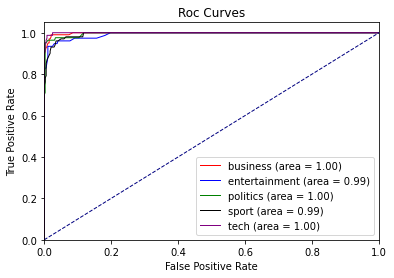

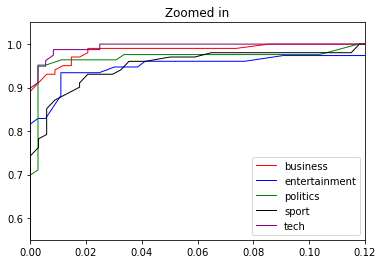

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest_categories = []

forest_results = []
for x in train_data.category:
    if x == 'business':
        forest_categories.append(1)
    elif x == 'entertainment':
        forest_categories.append(2)
    elif x == 'politics':
        forest_categories.append(3)
    elif x == 'sport':
        forest_categories.append(4)
    elif x == 'tech':
        forest_categories.append(5)
forest = RandomForestClassifier()

forest.fit(train_tf_idf_counts, forest_categories)
y_pred = forest.predict(test_tf_idf_counts)

for x in y_pred:
    if  x.round() <= 1:
        forest_results.append('business')
    if  x.round() == 2:
        forest_results.append('entertainment')
    if  x.round() == 3:
        forest_results.append('politics')
    if  x.round() == 4:
        forest_results.append('sport')
    if  x.round() >= 5:
        forest_results.append('tech')

forest_test_categories = []
for x in test_data.category:
    if x == 'business':
        forest_test_categories.append(1)
    elif x == 'entertainment':
        forest_test_categories.append(2)
    elif x == 'politics':
        forest_test_categories.append(3)
    elif x == 'sport':
        forest_test_categories.append(4)
    elif x == 'tech':
        forest_test_categories.append(5)
print_scores(forest, test_tf_idf_counts, test_data.category)

#roc plot
y_test = np.array(forest_test_categories)
forest_probs = forest.predict_proba(test_tf_idf_counts)
y_test_multiclass = np.zeros((len(forest_test_categories),5))

for x in range(len(forest_test_categories)):
    y_test_multiclass[x,forest_test_categories[x]-1] = 1
    
plot_roc_curve(y_test_multiclass, forest_probs)

# Random Forest based on count vectors

Macro averaged metrics:
Precision: [0.96923077 0.88055556 0.88209291 0.96666667 0.91641414 0.92666667
 0.95681818 0.88880231 0.93506494 0.93681818] 

Recall: [0.94642857 0.855      0.85       0.95       0.905      0.9
 0.95       0.88555556 0.92698413 0.94      ] 

F measure: [0.95461538 0.8571884  0.85323539 0.95515152 0.90609244 0.89292929
 0.95214286 0.88047619 0.92738095 0.93132242] 

Accuracy: [0.95454545 0.86363636 0.86363636 0.95454545 0.90909091 0.90909091
 0.95454545 0.88636364 0.93181818 0.93181818] 



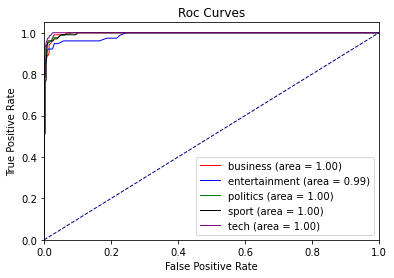

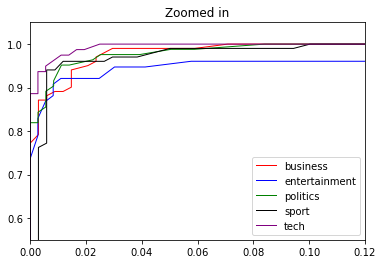

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(train_counts, forest_categories)
y_pred = forest.predict(test_counts)

for x in y_pred:
    if  x.round() <= 1:
        forest_results.append('business')
    if  x.round() == 2:
        forest_results.append('entertainment')
    if  x.round() == 3:
        forest_results.append('politics')
    if  x.round() == 4:
        forest_results.append('sport')
    if  x.round() >= 5:
        forest_results.append('tech')

print_scores(forest, test_counts, test_data.category)

#roc plot
y_test = np.array(forest_test_categories)
forest_probs = forest.predict_proba(test_counts)
y_test_multiclass = np.zeros((len(forest_test_categories),5))

for x in range(len(forest_test_categories)):
    y_test_multiclass[x,forest_test_categories[x]-1] = 1
    
plot_roc_curve(y_test_multiclass, forest_probs)

# Bayes based on tf idf vectors

Macro averaged metrics:
Precision: [0.95833333 0.91284271 0.92051282 0.96666667 0.88846154 0.95681818
 0.98181818 0.95681818 0.93333333 0.98181818] 

Recall: [0.94642857 0.9        0.875      0.95       0.855      0.95
 0.975      0.95       0.90198413 0.97777778] 

F measure: [0.95091973 0.90061625 0.88291071 0.95324675 0.86036789 0.95214286
 0.97714286 0.94857143 0.90991841 0.97871148] 

Accuracy: [0.95454545 0.90909091 0.88636364 0.95454545 0.86363636 0.95454545
 0.97727273 0.95454545 0.90909091 0.97727273] 



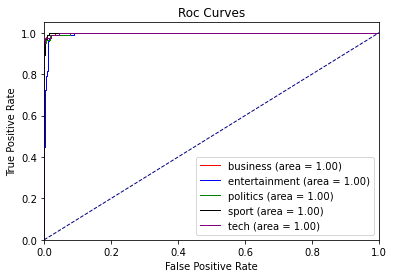

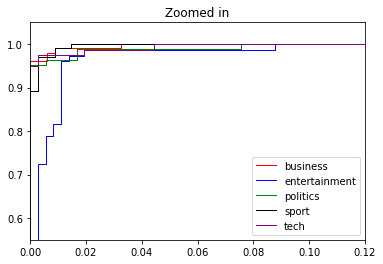

In [15]:
from sklearn.naive_bayes import MultinomialNB
bayes_clf = MultinomialNB().fit(train_tf_idf_counts, train_data.category)

bayes_predicted = bayes_clf.predict(test_tf_idf_counts)

bayes_probs = bayes_clf.predict_proba(test_tf_idf_counts)
print_scores(bayes_clf, test_tf_idf_counts, test_data.category)

plot_roc_curve(y_test_multiclass, bayes_probs)

# Bayes based on count vectors

Macro averaged metrics:
Precision: [1.         0.935      0.97777778 0.98181818 0.96       0.97777778
 0.97777778 0.95       0.98181818 0.95959596] 

Recall: [1.         0.93       0.975      0.975      0.955      0.975
 0.975      0.955      0.97142857 0.95777778] 

F measure: [1.         0.92891813 0.97490196 0.97714286 0.95391813 0.97490196
 0.97490196 0.95114035 0.97509158 0.95772765] 

Accuracy: [1.         0.93181818 0.97727273 0.97727273 0.95454545 0.97727273
 0.97727273 0.95454545 0.97727273 0.95454545] 



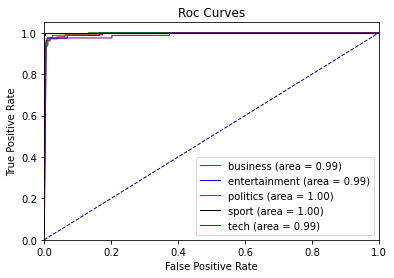

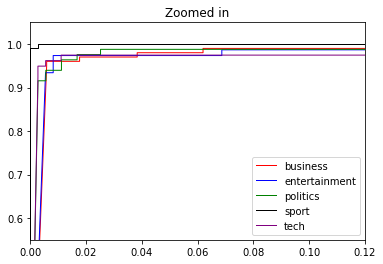

In [16]:
bayes_clf = MultinomialNB().fit(train_counts, train_data.category)

bayes_predicted = bayes_clf.predict(test_counts)

bayes_probs = bayes_clf.predict_proba(test_counts)
print_scores(bayes_clf, test_counts, test_data.category)

plot_roc_curve(y_test_multiclass, bayes_probs)

# SVM based on tf idf vectors

In [17]:
#svm cells take a long time to run
from sklearn import svm
from sklearn.model_selection import GridSearchCV

gamma = np.logspace(-3, 1, 4)
svm_parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5],'gamma':gamma}
svm = svm.SVC(probability=True)
svm_clf = GridSearchCV(svm, svm_parameters)
svm_clf.fit(train_tf_idf_counts, train_data.category)
print("Best parameters:")
svm_clf.best_params_

Best parameters:


{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

Macro averaged metrics:
Precision: [0.98333333 0.92777778 0.94181818 0.98181818 0.97777778 0.97777778
 1.         0.95       1.         0.86474359] 

Recall: [0.975      0.93       0.925      0.975      0.98       0.975
 1.         0.955      1.         0.83777778] 

F measure: [0.97797101 0.92770898 0.92210012 0.97714286 0.97770898 0.97490196
 1.         0.95114035 1.         0.80624709] 

Accuracy: [0.97727273 0.93181818 0.93181818 0.97727273 0.97727273 0.97727273
 1.         0.95454545 1.         0.81818182] 



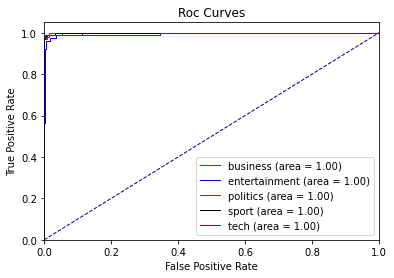

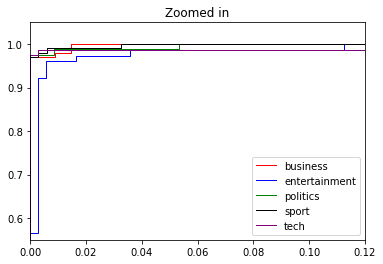

In [18]:
print_scores(svm_clf, test_tf_idf_counts, test_data.category)

svm_probs = svm_clf.predict_proba(test_tf_idf_counts)
plot_roc_curve(y_test_multiclass, svm_probs)

# SVM based on count vectors

In [ ]:
svm_clf.fit(train_counts, train_data.category)
print_scores(svm_clf, test_tf_idf_counts, test_data.category)

svm_probs = svm_clf.predict_proba(test_tf_idf_counts)
plot_roc_curve(y_test_multiclass, svm_probs)

# KNN

In [ ]:
import scipy.spatial
from collections import Counter
from sklearn.model_selection import train_test_split
    
def knn_predict(X_train, Y_train, X_test, k):
    final_output = []
    for i in range(0,X_test.shape[0]):
        x_te = X_test[i].toarray().squeeze()
        d = []
        votes = []
        for j in range(X_train.shape[0]):
            x_tr = X_train[j].toarray().squeeze()
            dist = scipy.spatial.distance.euclidean(x_tr, x_te)
            d.append([dist, j])
        d.sort()
        d = d[0:k]
        for d, j in d:
            votes.append(Y_train[j])
        ans = Counter(votes).most_common(1)[0][0]
        final_output.append(ans)
    return final_output

def pred_evaluation(final_output, Y_Test):
    true_positives = 0
    for x in range(len(final_output)):
        if final_output[x] == Y_Test[x]:
            true_positives += 1
    return(true_positives/len(final_output))

def shuffle_sparce_matrix(matrix):
    index = np.arange(np.shape(matrix)[0])
    np.random.shuffle(index)
    return index

def knn_cross_validation(knn_train_x, knn_train_y, test_tf_idf_counts, numf_of_neighbours, number_of_sets):
    import math
    cross_validation_scores = np.zeros(number_of_sets)
    setsize = math.floor(knn_train_x.shape[0]/number_of_sets)
#     print('knn crossvalidation setsizes =',setsize)
    for x in range(number_of_sets):
        print('evaluating  set number:',x+1,'...')
        knn_prediction = knn_predict(knn_train_x[setsize*x : setsize*x + setsize], knn_train_y[setsize*x : setsize*x + setsize], test_tf_idf_counts, numf_of_neighbours)
        cross_validation_scores[x] = pred_evaluation(knn_prediction, test_data.category)
    print('\n true positives rates for each set:\n',cross_validation_scores)
    print("\non average:",np.mean(cross_validation_scores))

# KNN based on tf idf vectors

In [ ]:
from sklearn.model_selection import cross_val_score

#randomize the order of the data to split them for cross validation
knn_indexes = shuffle_sparce_matrix(train_tf_idf_counts)
knn_train_x = train_tf_idf_counts[knn_indexes]
knn_train_y = np.array(train_data.category)[knn_indexes]
num_of_neighbours = 5
number_of_sets = 5

knn_cross_validation(knn_train_x, knn_train_y, test_tf_idf_counts, num_of_neighbours, number_of_sets)

# KNN based on count vectors

In [ ]:
knn_indexes = shuffle_sparce_matrix(train_counts)
knn_train_x = train_counts[knn_indexes]
knn_train_y = np.array(train_data.category)[knn_indexes]
num_of_neighbours = 5
number_of_sets = 5

knn_cross_validation(knn_train_x, knn_train_y, test_counts, num_of_neighbours, number_of_sets)

# EXERCISE 3

In [ ]:
from numpy import linalg as LA
#use train data to create the starting points
business_count = 0
entertainment_count = 0
politics_count = 0
sport_count = 0
tech_count = 0

#get number of each feature
for x in train_data.category:
    if x == "business":
        business_count += 1
    if x == "entertainment":
        entertainment_count += 1
    if x == "politics":
        politics_count += 1
    if x == "sport":
        sport_count += 1
    if x == "tech":
        tech_count += 1

entertainment_count += business_count
politics_count += entertainment_count
sport_count += politics_count
tech_count += sport_count

#create the starting points
parse = train_counts[0:business_count]
business_point = np.mean(parse, axis=0)
business_point = np.squeeze(np.asarray(business_point))

parse = train_counts[business_count:entertainment_count]
entertainment_point = np.mean(parse, axis=0)
entertainment_point = np.squeeze(np.asarray(entertainment_point))

parse = train_counts[entertainment_count:politics_count]
politics_point = np.mean(parse, axis=0)
politics_point = np.squeeze(np.asarray(politics_point))

parse = train_counts[politics_count:sport_count]
sport_point = np.mean(parse, axis=0)
sport_point = np.squeeze(np.asarray(sport_point))

parse = train_counts[sport_count:tech_count]
tech_point = np.mean(parse, axis=0)
tech_point = np.squeeze(np.asarray(tech_point))

print("business starting point      " ,business_point, "with norm", LA.norm(business_point))
print("entertainment starting point " ,entertainment_point, "with norm", LA.norm(entertainment_point))
print("politics starting point      " ,politics_point, "with norm", LA.norm(politics_point))
print("sport starting point         " ,sport_point, "with norm", LA.norm(sport_point))
print("tech starting point          " ,tech_point, "with norm", LA.norm(tech_point))
temp = business_point

In [ ]:
from scipy import spatial

def find_mean(neighbourhood,counts):
    total = np.zeros(counts.shape[1], dtype = np.float64)
    for x in neighbourhood:
        parse = counts[x].toarray().squeeze()
        total = np.add(total, parse)
    return total/len(neighbourhood)

#create similarity array
shape = (5, test_counts.shape[0])
similarity_array = np.zeros(shape)
numofreps = 2
for i in range (numofreps):
    #fill the similarity array
    for x in range(test_counts.shape[0]):
        temp_vector = test_counts[x].toarray().squeeze()
        similarity_array[0][x] = (1 - spatial.distance.cosine(test_counts[x].toarray().squeeze(), business_point))
    for x in range(test_counts.shape[0]):
        temp_vector = test_counts[x].toarray().squeeze()
        similarity_array[1][x] = (1 - spatial.distance.cosine(test_counts[x].toarray().squeeze(), entertainment_point))
    for x in range(test_counts.shape[0]):
        temp_vector = test_counts[x].toarray().squeeze()
        similarity_array[2][x] = (1 - spatial.distance.cosine(test_counts[x].toarray().squeeze(), politics_point))
    for x in range(test_counts.shape[0]):
        temp_vector = test_counts[x].toarray().squeeze()
        similarity_array[3][x] = (1 - spatial.distance.cosine(test_counts[x].toarray().squeeze(), sport_point))
    for x in range(test_counts.shape[0]):
        temp_vector = test_counts[x].toarray().squeeze()
        similarity_array[4][x] = (1 - spatial.distance.cosine(test_counts[x].toarray().squeeze(), tech_point))
    print('step',i+1)
    print("similarity_array:")
    print(similarity_array)
    #create new means
    business_neighbourhood = np.array([])
    entertainment_neighbourhood = np.array([])
    politics_neighbourhood = np.array([])
    sport_neighbourhood = np.array([])
    tech_neighbourhood = np.array([])
    dt = similarity_array.T
    count=0
    if i == numofreps:
        break
    for x in dt:
        max = np.amax(x)
        for y in range(5):
            if x[y] == max:
                if y == 0:
                    business_neighbourhood = np.append(business_neighbourhood, count)
                if y == 1:
                    entertainment_neighbourhood = np.append(entertainment_neighbourhood, count)
                if y == 2:
                    politics_neighbourhood = np.append(politics_neighbourhood, count)
                if y == 3:
                    sport_neighbourhood = np.append(sport_neighbourhood, count)
                if y == 4:
                    tech_neighbourhood = np.append(tech_neighbourhood, count)
        count += 1
    business_point = find_mean(business_neighbourhood,test_counts)
    entertainment_point = find_mean(entertainment_neighbourhood,test_counts)
    politics_point = find_mean(politics_neighbourhood,test_counts)
    sport_point = find_mean(sport_neighbourhood,test_counts)
    tech_point = find_mean(tech_neighbourhood,test_counts)
    print('\nnew_means:')
    print('business_point:     ',business_point)
    # print(temp)
    print('entertainment_point:',entertainment_point)
    print('politics_point      ',politics_point)
    print('sport_point:        ',sport_point)
    print('tech_point:         ',tech_point,'\n\n')

In [ ]:
#evaluation
count=0
kmeans_pred = np.zeros(test_counts.shape[0])
for x in dt:
    max = np.amax(x)
    for y in range(5):
        if x[y] == max:
            if y == 0:
                kmeans_pred[count] = 1
            if y == 1:
                kmeans_pred[count] = 2
            if y == 2:
                kmeans_pred[count] = 3
            if y == 3:
                kmeans_pred[count] = 4
            if y == 4:
                kmeans_pred[count] = 5
    count += 1
print(pred_evaluation(kmeans_pred, y_test))
print("close enough?")

# EXERCISE 4

# Clustering using document-embeddings array and PCA

In [ ]:
import gensim
from gensim.models import Word2Vec

tokenized = train_data.content.apply(lambda x: x.split())

w2v_model = gensim.models.Word2Vec(
    tokenized,
    size = 200,
    window = 5,
    min_count = 2,
    sg = 1,
    hs = 0,
    negative = 10,
    workers = 4,
    seed = 34)
# train_counts.vocabulary
w2v_model.train(train_data.content, total_examples=w2v_model.corpus_count, epochs = 20)

In [ ]:
# new_stop_words = {'!','#','$','%','&','(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','^','_','`','{','|','}','~'}
# my_stop_words.union(new_stop_words)

def wv_to_dv(x, w2v_model):
    doc_vector = np.zeros(200)
    word_count = 0
    
    vectorizer = CountVectorizer()
    vectorizer.fit([train_data.content[x]])
    vocabulary = vectorizer.vocabulary_
    for y in vocabulary:
        if y in w2v_model.wv.vocab:
            word_count += 1
            word_vector = w2v_model.wv[y]
            doc_vector = np.add(doc_vector, word_vector)
    return doc_vector/word_count

#create all the doc_vectors
doc_vectors = np.zeros((len(train_data.content),200))
for x in range(len(train_data.content)):
    dv = wv_to_dv(x, w2v_model)
    doc_vectors[x][:] = dv
print("First 10 scalars of the first 5 doc vectors:")
doc_vectors[0:5,0:10]

In [ ]:
# https://www.kdnuggets.com/2017/03/naive-sharding-centroid-initialization-method.html
# some extra code to pick good initial centers instead of random ones
from math import sqrt, floor
import numpy as np

def naive_sharding(ds, k):
    
    n = np.shape(ds)[1]
    m = np.shape(ds)[0]
    centroids = np.mat(np.zeros((k,n)))

    # Sum all elements of each row, add as col to original dataset, sort
    composite = np.mat(np.sum(ds, axis=1))
    ds = np.append(composite.T, ds, axis=1)
    ds.sort(axis=0)

    # Step value for dataset sharding
    step = floor(m/k)

    # Vectorize mean ufunc for numpy array
    vfunc = np.vectorize(_get_mean)

    # Divide matrix rows equally by k-1 (so that there are k matrix shards)
    # Sum columns of shards, get means; these columnar means are centroids
    for j in range(k):
        if j == k-1:
            centroids[j:] = vfunc(np.sum(ds[j*step:,1:], axis=0), step)
        else:
            centroids[j:] = vfunc(np.sum(ds[j*step:(j+1)*step,1:], axis=0), step)

    return centroids

def _get_mean(sums, step):
    return sums/step

In [ ]:
#initialize centers
from sklearn.cluster import KMeans
import sklearn.preprocessing

k=5
minmax_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
doc_vectors_scaled = minmax_scaler.fit_transform(doc_vectors)

centroids_scaled = naive_sharding(doc_vectors_scaled, k)
print ('10 first scalars of initial center vectors\n')
print(centroids_scaled[0:k,0:10])


In [ ]:
steps = 0
while True:
    kmeans = KMeans(n_clusters = k).fit(doc_vectors_scaled)
    prediction = kmeans.predict(centroids_scaled)
    print(prediction)
    if np.any(prediction == 0) and np.any(prediction == 1) and np.any(prediction == 2) and np.any(prediction == 3) and np.any(prediction == 4):
        for x in range(5):
            prediction = kmeans.predict(centroids_scaled)
            centroids_scaled = kmeans.cluster_centers_
        break
    centroids_scaled = kmeans.cluster_centers_
    steps+=1
    print(steps)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(doc_vectors_scaled)

principalDf = pd.DataFrame(data = principalComponents,
                          columns = ["principal component 1","principal component 2"])
finalDf = pd.concat([principalDf, train_data.category], axis = 1)
print(finalDf)

In [ ]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Clustering using document-embeddings array and PCA', fontsize = 20)
targets = ['business', 'entertainment', 'politics', 'sport', 'tech']
colors = ['r', 'g', 'b' , 'y', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Clustering using tf idf and PCA

In [ ]:
from numpy.random import random 
from scipy.sparse import * 

steps = 0
while True:
    kmeans = KMeans(n_clusters = k, init = 'random').fit(train_tf_idf_counts)
    prediction = kmeans.predict(kmeans.cluster_centers_)
    print(prediction)
    if np.any(prediction == 0) and np.any(prediction == 1) and np.any(prediction == 2) and np.any(prediction == 3) and np.any(prediction == 4):
        break
    steps+=1
    print(steps)
kmeans.cluster_centers_[0]

In [ ]:
dense_train_tf_idf_counts = train_tf_idf_counts.toarray()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dense_train_tf_idf_counts)
principalComponents
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ["principal component 1","principal component 2"])
finalDf = pd.concat([principalDf, train_data.category], axis = 1)
print(finalDf)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Clustering using tf idf and PCA', fontsize = 20)
targets = ['business', 'entertainment', 'politics', 'sport', 'tech']
colors = ['r', 'g', 'b' , 'y', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Clustering using word counts and ICA

In [ ]:
from sklearn import preprocessing

normalized_train_counts = preprocessing.normalize(train_counts)
steps = 0
while True:
    kmeans = KMeans(n_clusters = k, init = 'random').fit(normalized_train_counts)
    prediction = kmeans.predict(kmeans.cluster_centers_)
    print(prediction)
    if np.any(prediction == 0) and np.any(prediction == 1) and np.any(prediction == 2) and np.any(prediction == 3) and np.any(prediction == 4):
        for x in range(5):
            prediction = kmeans.predict(centroids_scaled)
            centroids_scaled = kmeans.cluster_centers_
        break
    steps+=1
    print(steps)
kmeans.cluster_centers_

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
dense_train_counts = train_counts.toarray()

transformer = FastICA(n_components=2,
        random_state=0)
independentComponents = transformer.fit_transform(dense_train_counts)

independentDf = pd.DataFrame(data = independentComponents,
                          columns = ["Independent component 1","Independent component 2"])
finalDf = pd.concat([independentDf, train_data.category], axis = 1)
print(finalDf)

In [ ]:
fig = plt.figure(figsize = (8,8))
plt.xlim([-0.03, 0.125])
plt.ylim([-0.091, 0.1])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Independent Component 1', fontsize = 15)
ax.set_ylabel('Independent Component 2', fontsize = 15)
ax.set_title('Clustering using word counts and ICA', fontsize = 20)
targets = ['business', 'entertainment', 'politics', 'sport', 'tech']
colors = ['r', 'g', 'b' , 'y', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Independent component 1']
               , finalDf.loc[indicesToKeep, 'Independent component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()